# Most starred repos on Github
My goal here is to visualize which are the most starred repos on Github for different programming languages, and to see how many contributors those repos have (and how that number changes through time).


First I get all the repos' info with an API call:

In [1]:
import requests


languages = ['python',
             'javascript',
             'ruby',
             'c',
             'java',
             'perl',
             'haskell',
             'go']


def get_contributors_num(contributors_dict):
    """
    (dict) -> dict

    Returns a new dict, with the repos' names as keys
    and the number of contributors as values.
    """
    num_contributors = {}
    
    for k, v in contributors_dict.items():
        url = v + '?page=1&per_page=1000'
        r = requests.get(url)
        response_dict = r.json()
        num_contributors[k] = len(response_dict)
    
    return num_contributors

# Make an API call for each language and store the responses.
raw_data = {} # raw_data[language] = [{74 k,v} * 30 repos]
for language in languages:
    url = 'https://api.github.com/search/repositories?q=language:{}&sort=stars'
    url = url.format(language)
    r = requests.get(url)
    response_dict = r.json()
    # Create a list to hold the info from the 30 most starred repos. 
    repo_dicts = response_dict['items']
    raw_data[language] = repo_dicts

Now that I have all the raw data, I process it to visualize the 30 most starred repos for each language:

In [8]:
# Extract info for the most starred projects graph.
repos_names = {} # k:language, v:list of repos_names
repos_info = {}  # k:'value', v: stargazers_count; k:'xlink', v:'html-url'
for language in languages:
    names, plot_dicts = [], []
    for repo_dict in raw_data[language]:
        names.append(repo_dict['name'])
        plot_dict = {
            'value': repo_dict['stargazers_count'],
            'label': repo_dict['description'] or '',
            'xlink': repo_dict['html_url'],
            }
        plot_dicts.append(plot_dict)
    repos_names[language] = names
    repos_info[language] = plot_dicts


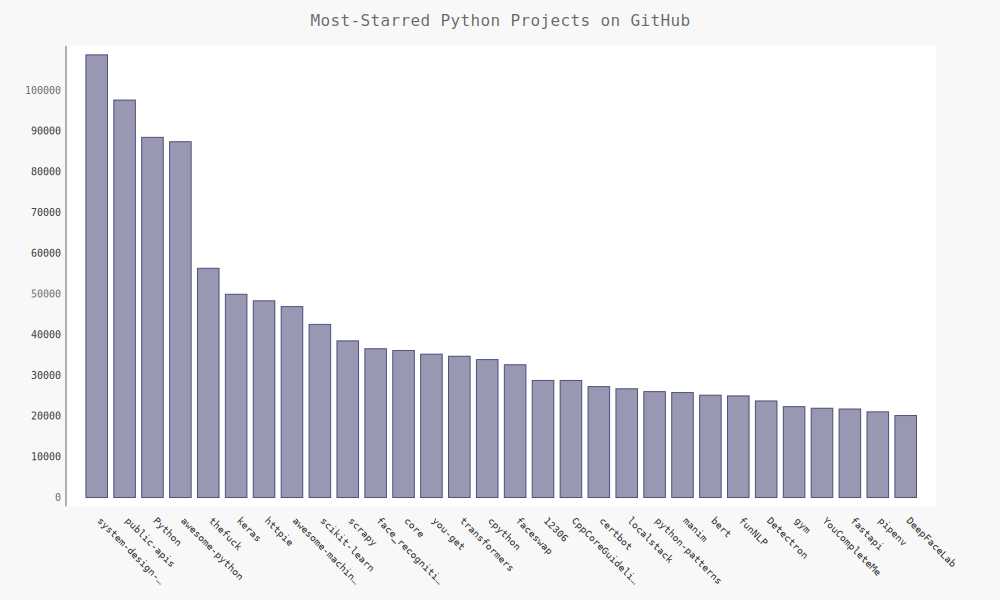

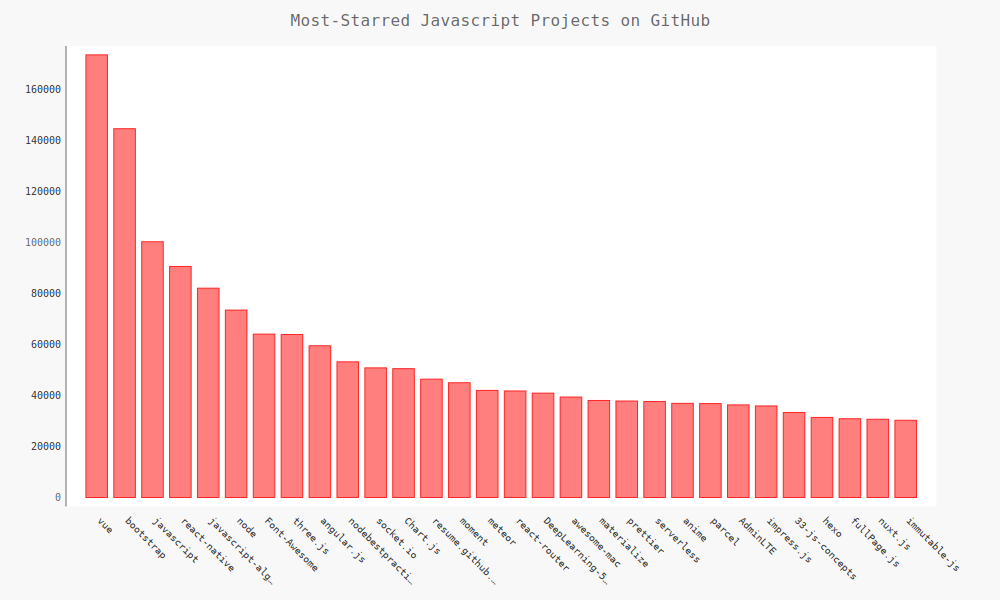

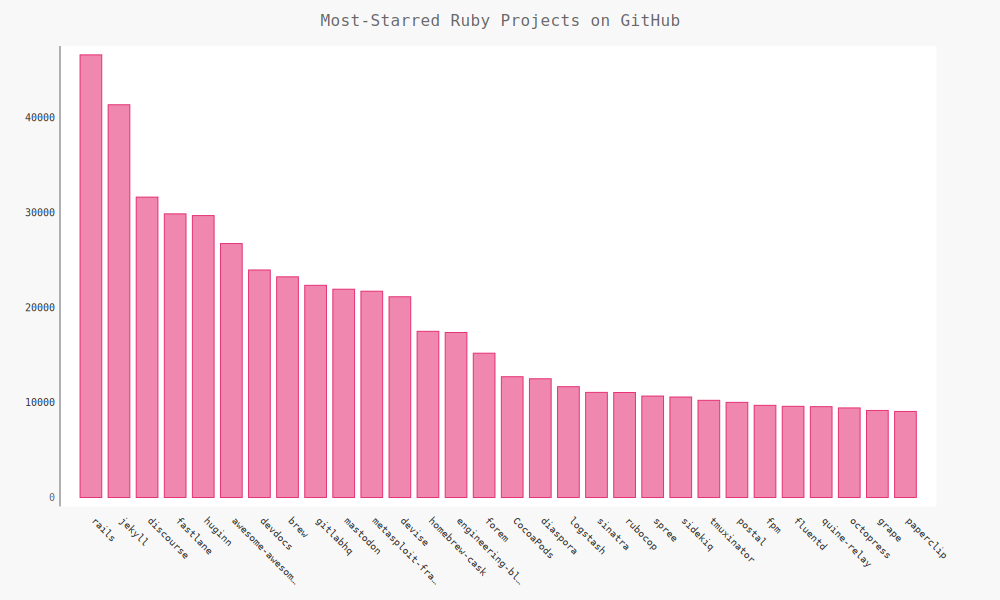

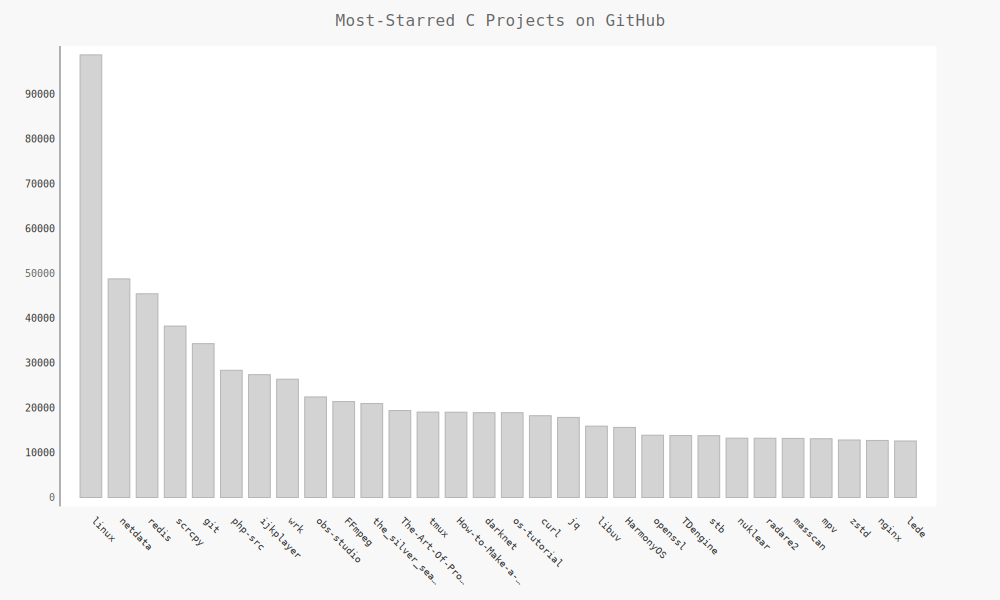

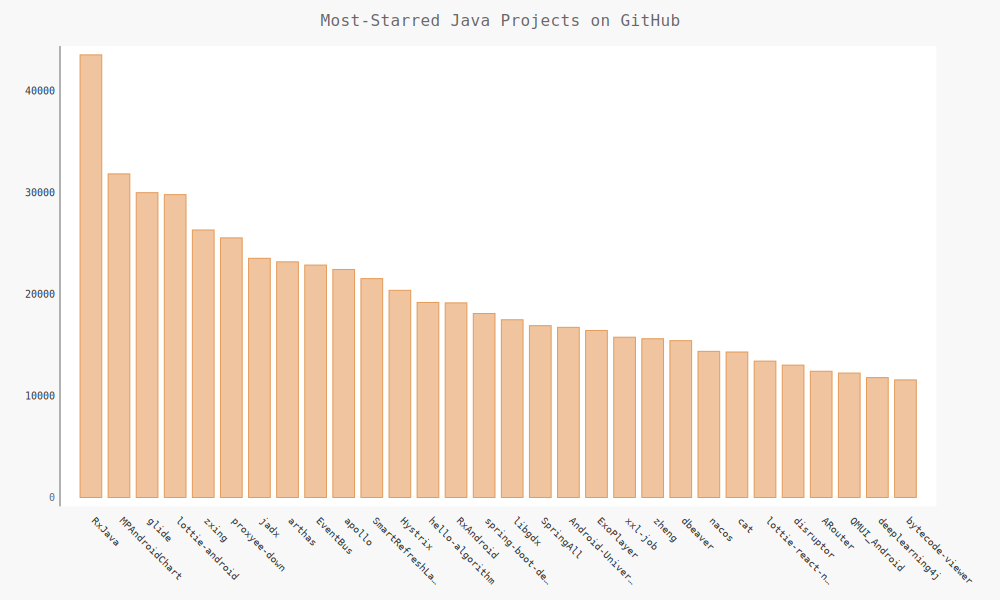

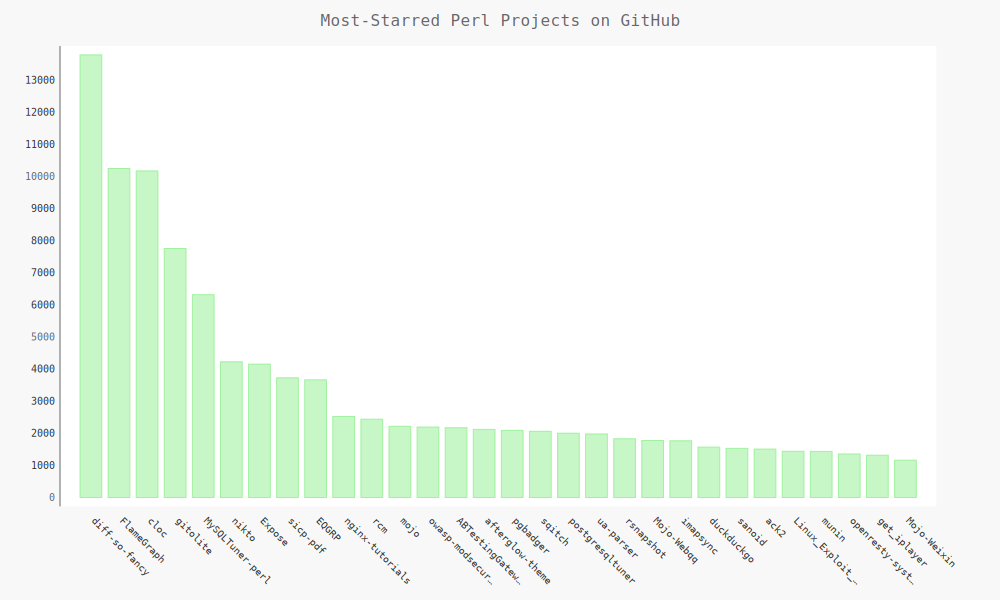

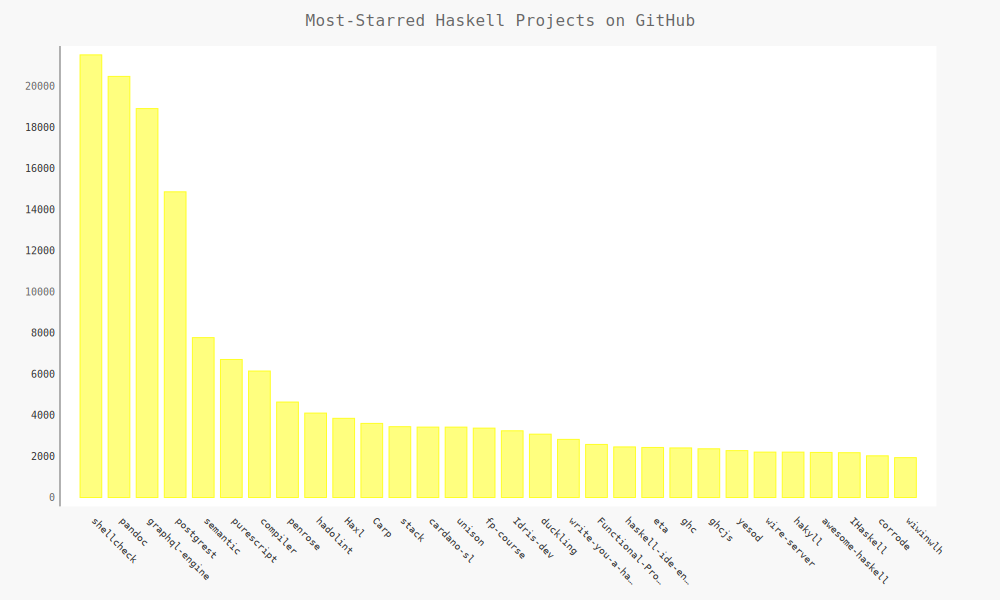

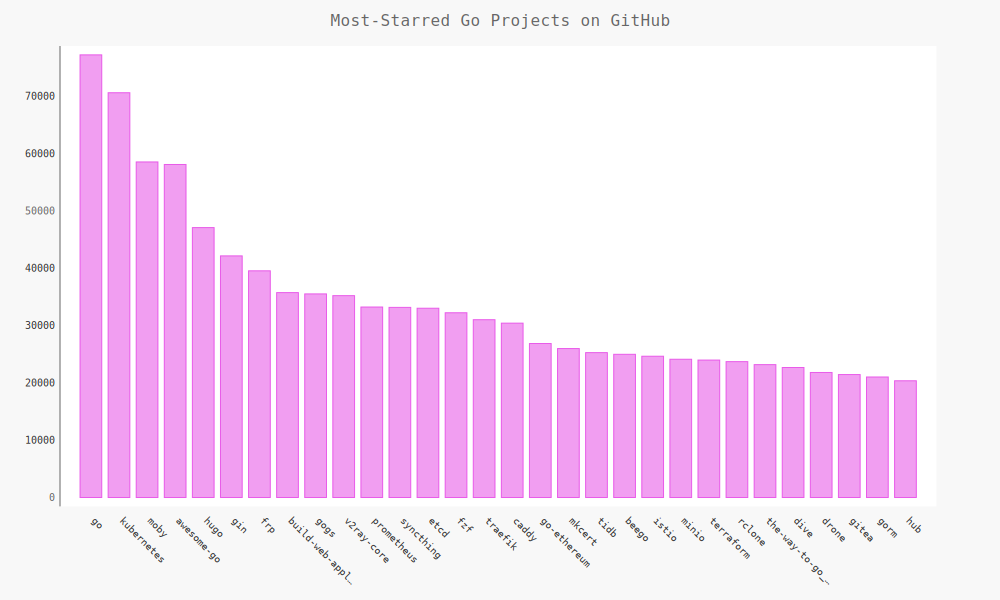

In [10]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import SVG, display

colors = ['#333366',
          '#ff0000',
          '#e0115f',
          '#a9a9a9',
          '#e08b3e',
          '#90ee90',
          '#ffff00',
          '#e53fe5']

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000
    

for language in languages:
    my_style = LS('{}'.format(colors[languages.index(language)]), base_style=LCS)
    chart = pygal.Bar(my_config, style=my_style)
    chart.title = 'Most-Starred {} Projects on GitHub'.format(language.capitalize())
    chart.x_labels = repos_names[language]
    
    chart.add('', repos_info[language])
    #chart.render_to_file('{}_repos.svg'.format(language))
    display(SVG(chart.render(disable_xml_declaration=True)))


And now I want to compare how many contributors work(ed) in each of the top 5 repos of each language: 

In [11]:
# Make an API call to get the number of contributors for each repo
num_contributors = {}  # k-language, v-{repo-name: num_contributors}
for language in languages:
    contributors_urls = {}
    for repo_dict in raw_data[language]:
        contributors_urls[repo_dict['name']] = repo_dict['contributors_url']
    num_contributors[language] = get_contributors_num(contributors_urls)

top_5_repos = {}
for language, repos_names in repos_names.items():
    top_5 = repos_names[:5]
    top_5_repos[language] = top_5

top_5_xlinks = {}
for language, repos_info_list in repos_info.items():
    xlinks = []
    for i in range(5):
        xlink = repos_info_list[i]['xlink']
        xlinks.append(xlink)
    top_5_xlinks[language] = xlinks

top_5_num_contrib = {}
for language, repos_contrib in num_contributors.items():
    top_5_contrib = []
    for name in top_5_repos[language]:
        num = repos_contrib[name]
        top_5_contrib.append(num)
    top_5_num_contrib[language] = top_5_contrib

This is just a first graph to see how it goes, __WIP__

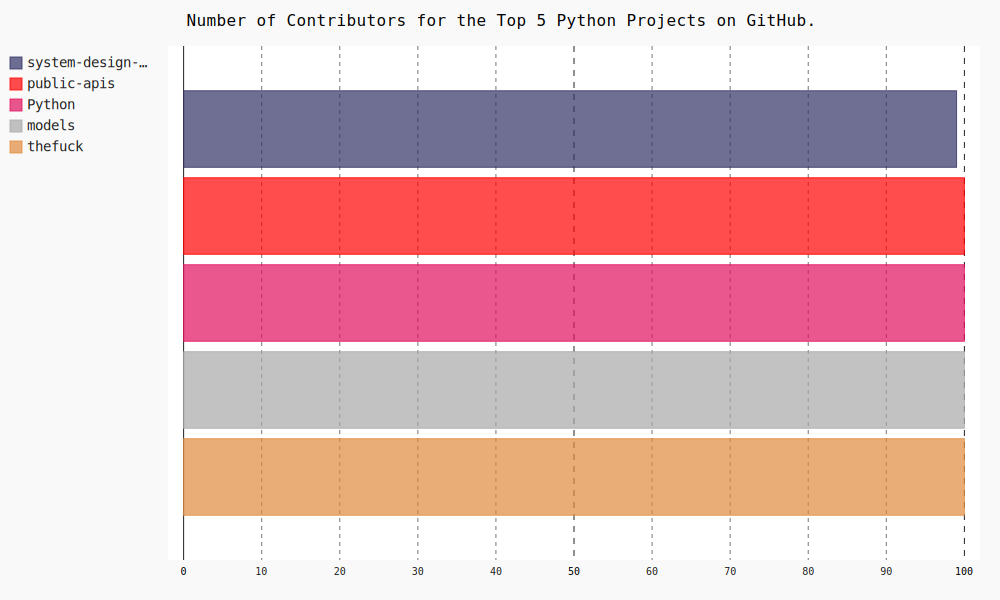

In [13]:
import pygal
from pygal.style import Style
from IPython.display import SVG, display

my_config = pygal.Config()
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.width = 1000

# Compare 5 top projects
########### WIP

########### WIP

# ONLY ONE GRAPH, COLORS WORK...
my_style = Style(colors=colors)
chart = pygal.HorizontalBar(my_config, style=my_style)
chart.title = "Number of Contributors for the Top 5 Python Projects on GitHub."

chart.add('system-design-primer', 99)
chart.add('public-apis', 100)
chart.add('Python', 100)
chart.add('models', 100)
chart.add('thefuck', 100)
#chart.render_to_file('num_contrib_top5_Python_repos2.svg')
display(SVG(chart.render(disable_xml_declaration=True)))   # IT'S NOT INTERACTIVE!!!???

So, I ended up falling through a rabbit hole here... ,:)<br>
I reached my API limit (60 calls per hour) with this project, and there's A LOT to learn about this before I can finish this, so now this is __ON HOLD__<br>
I will come back after learning SQL, I want to see how this graphs change through time.

### Info to continue:

response_dict
Out[50]: 
{'message': "API rate limit exceeded for 208.180.46.178.(But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)",
  'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}

from Google: how to obtain an api key for github
In your account settings, open the "Developer settings" section - 
https://github.com/settings/apps. Click on "New GitHub App" 
Fill the form with application details.

https://github.com/settings/apps/new
https://docs.github.com/en/free-pro-team@latest/developers/apps/about-apps